In [33]:
import rdflib
g = rdflib.Graph()
g.parse('movies_project.owl')
iri = "https://schema.org/"

In [34]:
#test_name = "Brad Pitt"
#test_id = 'brad_pitt'
test_id = 'al_pacino'
sparql = f"""SELECT ?a ?n (COUNT(?n) as ?nCount)
    WHERE {{
        <{iri}{test_id}> <{iri}isActor> ?m .
        ?m <{iri}hasActor> ?a .
        BIND (datatype(?a) AS ?string) .
        FILTER (?a != <{iri}{test_id}>) .
        ?a <{iri}myname> ?n
    }}
    GROUP BY ?n"""
res = g.query(sparql)
for row in res:
    #print(f"\n{row.m}")
    print(f"{row.n} | {row.nCount}")


Michelle Pfeiffer | 1
Steven Bauer | 1
Marlon Brando | 1
James Caan | 1
Robert De Niro | 2
Val Kilmer | 1
Robert Duvall | 1


In [35]:
people = []
people_ids = {}

In [36]:
sparql = f""" SELECT ?n 
    WHERE {{
        ?a a <{iri}myPerson> .
        ?a <{iri}myname> ?n .
        BIND (datatype(?n) AS ?string) .
    }}
"""
res = g.query(sparql)
for i,row in enumerate(res):
    people.append((i+1, {'name':str(row.n)}))
    people_ids[str(row.n)] = i+1
people

[(1, {'name': 'Melchior Lengyel'}),
 (2, {'name': 'Fran Walsh'}),
 (3, {'name': 'Jim Capobianco'}),
 (4, {'name': 'Frances McDormand'}),
 (5, {'name': 'Pierre Boileau'}),
 (6, {'name': 'Eric Roth'}),
 (7, {'name': 'Francis Ford Coppola'}),
 (8, {'name': 'Peter Farrelly'}),
 (9, {'name': 'Scott Frank'}),
 (10, {'name': 'George Lucas'}),
 (11, {'name': 'Catherine Keener'}),
 (12, {'name': 'Lawrence Kasdan'}),
 (13, {'name': 'Bob Gale'}),
 (14, {'name': 'Tom Schulman'}),
 (15, {'name': 'Paul Freeman'}),
 (16, {'name': 'Charles Chaplin'}),
 (17, {'name': 'Peter Savage'}),
 (18, {'name': 'Jan Pinkava'}),
 (19, {'name': 'Robin Wright'}),
 (20, {'name': 'Dean DeBlois'}),
 (21, {'name': 'Leonardo DiCaprio'}),
 (22, {'name': 'Richard Marquand'}),
 (23, {'name': 'Kim Sang-kyung'}),
 (24, {'name': 'Gustav Hasford'}),
 (25, {'name': 'Tony Kaye'}),
 (26, {'name': 'Tim Roth'}),
 (27, {'name': 'Rashida Jones'}),
 (28, {'name': 'Annette Bening'}),
 (29, {'name': 'Horton Foote'}),
 (30, {'name': 'Joe P

In [37]:
people_ids

{'Melchior Lengyel': 1,
 'Fran Walsh': 2,
 'Jim Capobianco': 3,
 'Frances McDormand': 4,
 'Pierre Boileau': 5,
 'Eric Roth': 6,
 'Francis Ford Coppola': 7,
 'Peter Farrelly': 8,
 'Scott Frank': 9,
 'George Lucas': 10,
 'Catherine Keener': 11,
 'Lawrence Kasdan': 12,
 'Bob Gale': 13,
 'Tom Schulman': 14,
 'Paul Freeman': 15,
 'Charles Chaplin': 16,
 'Peter Savage': 17,
 'Jan Pinkava': 18,
 'Robin Wright': 19,
 'Dean DeBlois': 20,
 'Leonardo DiCaprio': 21,
 'Richard Marquand': 22,
 'Kim Sang-kyung': 23,
 'Gustav Hasford': 24,
 'Tony Kaye': 25,
 'Tim Roth': 26,
 'Rashida Jones': 27,
 'Annette Bening': 28,
 'Horton Foote': 29,
 'Joe Pantoliano': 30,
 'Oreste Biancoli': 31,
 'Philip Kaufman': 32,
 'Ewan McGregor': 33,
 'Ellen DeGeneres': 34,
 'Gore Verbinski': 35,
 'Harry Connick Jr.': 36,
 'Rajkumar Hirani': 37,
 'Stephen Boyd': 38,
 'Burt Lancaster': 39,
 'Carlos Martínez López': 40,
 'John Logan': 41,
 'Lubna Azabal': 42,
 'Pierre Boulle': 43,
 'Gillo Pontecorvo': 44,
 'Michel Gondry': 4

In [38]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(people)
#G.add_nodes_from([
#    (1, {'name':'Al Pacino'}),
#    (2, {'name':'Robert De Niro'}),
#    (3, {'name':'Val Kilmer'})
#])
#G.add_edge(1,2,weight=2)
#G.add_edge(1,3,weight=1)
#G.add_edge(2,3,weight=1)


In [39]:
#import bokeh_network_plot
#from bokeh.io import output_file, show

In [40]:
for p in people_ids.keys():
    p_id = people_ids[p]
    id = '_'.join(p.lower().split())
    sparql = f"""SELECT ?n (COUNT(?n) as ?nCount)
        WHERE {{
            <{iri}{id}> <{iri}isActor> ?m .
            ?m <{iri}hasActor> ?a .
            BIND (datatype(?a) AS ?string) .
            FILTER (?a != <{iri}{id}>) .
            ?a <{iri}myname> ?n
        }}
        GROUP BY ?n"""
    res = g.query(sparql)
    for row in res:
        #print(p)
        #print(f"{row.n} | {row.nCount}")
        G.add_edge(p_id,int(people_ids[str(row.n)]),weight=int(row.nCount))

    sparql = f"""SELECT ?n (COUNT(?n) as ?nCount)
        WHERE {{
            <{iri}{id}> <{iri}isActor> ?m .
            ?m <{iri}hasDirector> ?a .
            BIND (datatype(?a) AS ?string) .
            FILTER (?a != <{iri}{id}>) .
            ?a <{iri}myname> ?n
        }}
        GROUP BY ?n"""
    res = g.query(sparql)
    for row in res:
        #print(p)
        #print(f"{row.n} | {row.nCount}")
        G.add_edge(p_id,int(people_ids[str(row.n)]),weight=int(row.nCount))
    
    sparql = f"""SELECT ?n (COUNT(?n) as ?nCount)
        WHERE {{
            <{iri}{id}> <{iri}isDirector> ?m .
            ?m <{iri}hasActor> ?a .
            BIND (datatype(?a) AS ?string) .
            FILTER (?a != <{iri}{id}>) .
            ?a <{iri}myname> ?n
        }}
        GROUP BY ?n"""
    res = g.query(sparql)
    for row in res:
        #print(p)
        #print(f"{row.n} | {row.nCount}")
        G.add_edge(p_id,int(people_ids[str(row.n)]),weight=int(row.nCount))    #break

    sparql = f"""SELECT ?n (COUNT(?n) as ?nCount)
        WHERE {{
            <{iri}{id}> <{iri}isWriter> ?m .
            ?m <{iri}hasDirector> ?a .
            BIND (datatype(?a) AS ?string) .
            FILTER (?a != <{iri}{id}>) .
            ?a <{iri}name> ?n
        }}
        GROUP BY ?n"""
    res = g.query(sparql)
    for row in res:
        #print(p)
        #print(f"{row.n} | {row.nCount}")
        G.add_edge(p_id,int(people_ids[str(row.n)]),weight=int(row.nCount))
    
    sparql = f"""SELECT ?n (COUNT(?n) as ?nCount)
        WHERE {{
            <{iri}{id}> <{iri}isDirector> ?m .
            ?m <{iri}hasWriter> ?a .
            BIND (datatype(?a) AS ?string) .
            FILTER (?a != <{iri}{id}>) .
            ?a <{iri}name> ?n
        }}
        GROUP BY ?n"""
    res = g.query(sparql)
    for row in res:
        #print(p)
        #print(f"{row.n} | {row.nCount}")
        G.add_edge(p_id,int(people_ids[str(row.n)]),weight=int(row.nCount))

    sparql = f"""SELECT ?n (COUNT(?n) as ?nCount)
        WHERE {{
            <{iri}{id}> <{iri}isActorOf> ?m .
            ?m <{iri}hasWriter> ?a .
            BIND (datatype(?a) AS ?string) .
            FILTER (?a != <{iri}{id}>) .
            ?a <{iri}name> ?n
        }}
        GROUP BY ?n"""
    res = g.query(sparql)
    for row in res:
        #print(p)
        #print(f"{row.n} | {row.nCount}")
        G.add_edge(p_id,int(people_ids[str(row.n)]),weight=int(row.nCount))
    
    sparql = f"""SELECT ?n (COUNT(?n) as ?nCount)
    WHERE {{
        <{iri}{id}> <{iri}isWriterOf> ?m .
        ?m <{iri}hasActor> ?a .
        BIND (datatype(?a) AS ?string) .
        FILTER (?a != <{iri}{id}>) .
        ?a <{iri}name> ?n
    }}
    GROUP BY ?n"""
    res = g.query(sparql)
    for row in res:
        #print(p)
        #print(f"{row.n} | {row.nCount}")
        G.add_edge(p_id,int(people_ids[str(row.n)]),weight=int(row.nCount))
    
    

In [41]:
gg = nx.adjacency_matrix(G)

C:\Users\cleme\AppData\Local\Temp\ipykernel_48540\4138529657.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  gg = nx.adjacency_matrix(G)


In [ ]:
import sknetwork

In [42]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
louvain = Louvain()
labels = louvain.fit_transform(gg)

In [45]:
gg

<1071x1071 sparse matrix of type '<class 'numpy.intc'>'
	with 2930 stored elements in Compressed Sparse Row format>

In [44]:
labels

array([222, 285, 284, ..., 348, 399,  63], dtype=int64)

In [178]:
import numpy as np
spring = nx.spring_layout(G,dim=20)
coords = np.array(list(spring.values()))
coords

array([[ 0.50389051, -0.65013963,  0.35546184, ...,  0.25664693,
         0.40462148,  0.64009225],
       [-0.54330939,  0.68121743, -0.06294756, ...,  0.71533895,
        -0.18256472,  0.18536592],
       [ 0.23207961, -0.44153342, -0.4747653 , ...,  0.527641  ,
         0.19844538, -0.50857186],
       ...,
       [-0.71053022,  0.30405864, -0.60124975, ...,  0.21116398,
        -0.1931916 ,  0.59740639],
       [-0.11847269, -0.08117589,  0.36449912, ...,  0.50942802,
         0.49630076,  0.56532574],
       [-0.33490562,  0.05718507,  0.02250262, ..., -0.15067181,
         0.08715077,  0.48275921]])

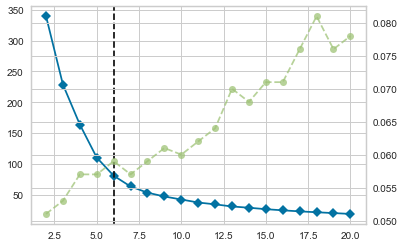

In [130]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KElbowVisualizer(KMeans(), k=20)
model.fit(coords)
k=model.elbow_value_


clusters = AgglomerativeClustering(k,linkage='ward').fit_predict(
        coords
    )

In [133]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
clusters = clusterer.fit_predict(coords)

In [134]:
len(set(clusters))

65

In [179]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import pandas as pd
#df = pd.DataFrame(coords)

import umap.umap_ as umap
emb = pd.DataFrame(umap.UMAP(n_components=3).fit_transform(coords))
df = pd.DataFrame(emb)
import hdbscan
clusterer = hdbscan.HDBSCAN()
clusters = clusterer.fit_predict(emb)
len(set(clusters))


92

<AxesSubplot: ylabel='distance'>

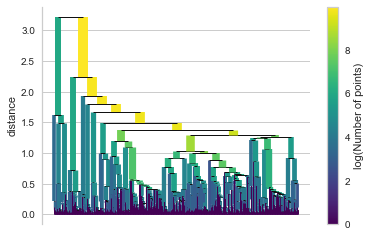

In [186]:
import seaborn as sns
clusterer.single_linkage_tree_.plot(
                               )

In [181]:
df['name'] = list(people_ids.keys())
df

,0,1,2,name
0,2.963690,6.320573,4.753774,Melchior Lengyel
1,7.349609,5.344326,0.976587,Fran Walsh
2,-2.247988,5.808491,1.830827,Jim Capobianco
3,9.302363,5.135045,0.022903,Frances McDormand
4,-2.247169,5.831978,1.829220,Pierre Boileau
...,...,...,...,...
1066,1.991971,7.805036,0.855414,Sidney Buchman
1067,-0.464201,7.497078,-0.071353,Jake Johnson
1068,0.663745,9.529001,1.203809,Vincenzo Cerami
1069,3.612110,5.247324,2.636243,Clark Cheng


In [182]:
df.columns = ['X','Y','Z','name']
df['cluster'] = clusters


In [183]:
df

,X,Y,Z,name,cluster
0,2.963690,6.320573,4.753774,Melchior Lengyel,-1
1,7.349609,5.344326,0.976587,Fran Walsh,1
2,-2.247988,5.808491,1.830827,Jim Capobianco,54
3,9.302363,5.135045,0.022903,Frances McDormand,4
4,-2.247169,5.831978,1.829220,Pierre Boileau,54
...,...,...,...,...,...
1066,1.991971,7.805036,0.855414,Sidney Buchman,41
1067,-0.464201,7.497078,-0.071353,Jake Johnson,17
1068,0.663745,9.529001,1.203809,Vincenzo Cerami,20
1069,3.612110,5.247324,2.636243,Clark Cheng,52


In [148]:
s3d = go.Scatter(x=df['X'],y=df['Y'],marker=dict(color=df['cluster']+5),text = [f"Name: {x[0]}\nCluster: {x[1]+1}".format(x) for x in zip(df['name'],df['cluster']) ],mode="markers")
layout = go.Layout (
        scene = dict(
            xaxis = dict (title = 'X'),
            yaxis = dict (title = 'Y'),
        )
    )
fig = go.Figure(data=[s3d], layout = layout)
iplot(fig)

In [184]:
import plotly.express as px
px.scatter(df, 'X', 'Y',hover_name='name',color=df['cluster'].astype(str))

In [ ]:
import umap.umap_ as umap
emb = umap.UMAP()

In [43]:
plot = bokeh_network_plot.network_plot(G)
#show(plot)

NameError: name 'bokeh_network_plot' is not defined

In [ ]:
output_file("whole_graph.html")
show(plot)